## Data collection

In [ ]:
!pip install gdown
!gdown --id 1CweTBC1ZUjzXJh_JQ0vD7XtTFuojjV5M

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1CweTBC1ZUjzXJh_JQ0vD7XtTFuojjV5M
From (redirected): https://drive.google.com/uc?id=1CweTBC1ZUjzXJh_JQ0vD7XtTFuojjV5M&confirm=t&uuid=f8fe13e5-82ee-40e1-8619-0909501a3bac
To: /content/telugu.zip
100% 2.68G/2.68G [00:55<00:00, 48.3MB/s]


In [ ]:
import zipfile
zip_path = '/content/telugu.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls
!cd datasetKN/
!ls

2.jpg  datasetKN  datasetKN.zip  my_model.h5  my_model.keras  sample_data
2.jpg  datasetKN  datasetKN.zip  my_model.h5  my_model.keras  sample_data


In [ ]:
!head -20 /content/IIIT-HW-Teluguv2/IIIT-HW-Telugu/vocab.txt

౦౹౽
౦౺౽
౦౻౽
౦౹౼
౦౹౾
౦౸౽
కౢప్తము
కూడా
తన
కానీ
అయితే
లేదు
తర్వాత
రెండు
చాలా
ఉంది
కొన్ని
మాత్రమే
తెలంగాణ
అంటే


## Imports

In [ ]:
from tensorflow.keras.layers import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

## Dataset splitting

In [ ]:
base_path = "/content/IIIT-HW-Teluguv2/IIIT-HW-Telugu/TeluguSeg/"
words_list = []

words = open(f"/content/IIIT-HW-Teluguv2/IIIT-HW-Telugu/train.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err":
        words_list.append(line.rstrip('\n'))

print(len(words_list))

np.random.shuffle(words_list)
words_list[:10]


80637


['TeluguSeg/train/8/35/5.jpg హాంప్టన్',
 'TeluguSeg/train/7/102/7.jpg కలుపుతుంది',
 'TeluguSeg/train/1/269/4.jpg హైదర్',
 'TeluguSeg/train/3/501/2.jpg స్ఫూర్తిగా',
 'TeluguSeg/train/7/193/2.jpg పరివర్తనా',
 'TeluguSeg/train/3/248/4.jpg రూపాయలిచ్చినా',
 'TeluguSeg/train/2/422/24.jpg చక్కని',
 'TeluguSeg/train/1/418/2.jpg అధ్యక్షత',
 'TeluguSeg/train/1/309/11.jpg నచ్చి',
 'TeluguSeg/train/1/293/17.jpg వెళ్ళాలనిపించలేదు']

90:5:5 ratio (train:validation:test).

In [ ]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 72573
Total validation samples: 4032
Total test samples: 4032


In [ ]:
base_image_path = os.path.join(base_path, "TeluguSeg/train")
def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")
        #print(line_split)
        name = line_split[0]
        label = line_split[1]
        #paths.append(name)
        #corrected_samples.append(label)
        #if os.path.getsize(name):
        paths.append(name)
        #paths.append(name)
        corrected_samples.append(label)

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
print(train_img_paths[:10], train_labels[:10])
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

['TeluguSeg/train/8/35/5.jpg', 'TeluguSeg/train/7/102/7.jpg', 'TeluguSeg/train/1/269/4.jpg', 'TeluguSeg/train/3/501/2.jpg', 'TeluguSeg/train/7/193/2.jpg', 'TeluguSeg/train/3/248/4.jpg', 'TeluguSeg/train/2/422/24.jpg', 'TeluguSeg/train/1/418/2.jpg', 'TeluguSeg/train/1/309/11.jpg', 'TeluguSeg/train/1/293/17.jpg'] ['హాంప్టన్', 'కలుపుతుంది', 'హైదర్', 'స్ఫూర్తిగా', 'పరివర్తనా', 'రూపాయలిచ్చినా', 'చక్కని', 'అధ్యక్షత', 'నచ్చి', 'వెళ్ళాలనిపించలేదు']


(290, 971, 3)


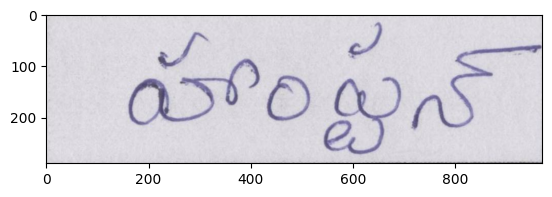

In [ ]:
#print(tf.io.read_file(base_path + 'TeluguSeg/train/8/35/5.jpg')
image = tf.io.read_file(base_path + 'TeluguSeg/train/8/35/5.jpg')
image = tf.image.decode_jpeg(image)

print(image.shape)
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()


In [ ]:
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    #label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = sorted(list(characters))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))
print(characters)
# Check some label samples.
train_labels_cleaned[:10]

Maximum length:  27
Vocab size:  87
['-', 'ఁ', 'ం', 'ః', 'అ', 'ఆ', 'ఇ', 'ఈ', 'ఉ', 'ఊ', 'ఋ', 'ఎ', 'ఏ', 'ఐ', 'ఒ', 'ఓ', 'ఔ', 'క', 'ఖ', 'గ', 'ఘ', 'ఙ', 'చ', 'ఛ', 'జ', 'ఝ', 'ఞ', 'ట', 'ఠ', 'డ', 'ఢ', 'ణ', 'త', 'థ', 'ద', 'ధ', 'న', 'ప', 'ఫ', 'బ', 'భ', 'మ', 'య', 'ర', 'ఱ', 'ల', 'ళ', 'వ', 'శ', 'ష', 'స', 'హ', 'ా', 'ి', 'ీ', 'ు', 'ూ', 'ృ', 'ౄ', 'ె', 'ే', 'ై', 'ొ', 'ో', 'ౌ', '్', 'ౘ', 'ౙ', 'ౠ', 'ౢ', '౦', '౧', '౨', '౩', '౪', '౫', '౬', '౭', '౮', '౯', '౸', '౹', '౺', '౻', '౼', '౽', '౾']


['హాంప్టన్',
 'కలుపుతుంది',
 'హైదర్',
 'స్ఫూర్తిగా',
 'పరివర్తనా',
 'రూపాయలిచ్చినా',
 'చక్కని',
 'అధ్యక్షత',
 'నచ్చి',
 'వెళ్ళాలనిపించలేదు']

In [ ]:

def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        #label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)
print(test_labels_cleaned)

['బ్యాటరీలతో', 'నిష్పత్తిని', 'నవరాత్రి', 'టెర్రరిజంతో', 'ఏడువందల', 'మంత్రి', 'మల్లాది', 'జర్దారీపై', 'చిరంజీవిని', 'అవకఅశాలు', 'పుట్టేదే', 'పసుపు', 'నడివయస్సు', 'నాటకం', 'ఇంతకాలం', 'ఐదేళ్లపాటు', 'కాంతివంతంగా', 'అవసరమే', 'ఆమోదముద్ర', 'వర్షాభావ', 'ఛిద్రమవడం', 'కనపడే', 'ఆకర్షణీయమైన', 'నాటి', 'తప్పిపోయినట్లు', 'పూడడం', 'ప్రారంభిస్తామని', 'యింట్లోకి', 'డైలీ', 'అగ్రనేతలను', 'సమైక్యత', 'రేబాన్', 'కనిపిస్తుంటుంది', 'పంచాక్షరి', 'కారెయాన్', 'పురోగమిస్తుంది', 'చేయగలిగిన', 'స్పెషల్', 'ఏలుతున్న', 'ఫోటోని', 'సీతాఫలం', 'విస్తృతపరచడం', 'సంస్థలకుందట', 'అతగాడికి', 'బాల్యంలోనే', 'తేదీనుండి', 'ఉద్యమం', 'కళాభిలాషతో', 'పేర్కొంటున్నాయి', 'నిర్మాతలు', 'చేసుకున్నాం', 'ఆస్పత్రుల్లోనే', 'పొలంలో', 'కల్పించ', 'పార్టీలతో', 'జనరల్స్', 'వగైరాలకు', 'శుభకార్యం', 'పౌరసరఫరాలు', 'కాజు', 'తారసపడుతుంటారు', 'ప్రవర్తనలనుబట్టివాడెవడి', 'సౌకుమార్యం', 'తలపెట్టి', 'పెద్దదైంది', 'తెలుగుతెరకెక్కాయి', 'లైన్లో', 'వ్యాపిస్తోందని', 'ఉర్దూమీద', 'నిర్మించకపోవడంపై', 'మధింపచేసేందుకు', 'సుష్మాస్వరాజ్', 'చేతుల్లోనే', 'అయ్యిందీ', 'బాధ్యతలో'

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

num_to_char = StringLookup(vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)

In [ ]:

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image


In [ ]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32


def preprocess_image(image_path, img_size=(image_width, image_height)):
    # image_path = str("/content/IIIT-HW-Teluguv2/IIIT-HW-Telugu/TeluguSeg"+image_path)
    # print(image_path)
    image = tf.io.read_file(base_path +image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

#print(process_images_labels("datasetKN/train/1.jpg", "ಕಾಯ್ದಿರಿಸಿದ್ದ"))
print(train_img_paths[3450])

print(train_img_paths[3450])
print(train_labels_cleaned[3450])
print(vectorize_label("ఒకటిన"))

TeluguSeg/train/5/337/4.jpg
TeluguSeg/train/5/337/4.jpg
భక్తులను
tf.Tensor(
[15 18 28 54 37 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99
 99 99 99], shape=(27,), dtype=int64)


## Prepare `tf.data.Dataset` objects

In [ ]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)


In [ ]:
train_ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

## Visualize a few samples

హాంప్టన్
కలుపుతుంది
హైదర్
స్ఫూర్తిగా
పరివర్తనా
రూపాయలిచ్చినా
చక్కని
అధ్యక్షత
నచ్చి
వెళ్ళాలనిపించలేదు
లిపి
జింబాబ్వే
చదవడంలో
నావ
మీదికి
నటీమణితో


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3129 (\N{TELUGU LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3134 (\N{TELUGU VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3114 (\N{TELUGU LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylab

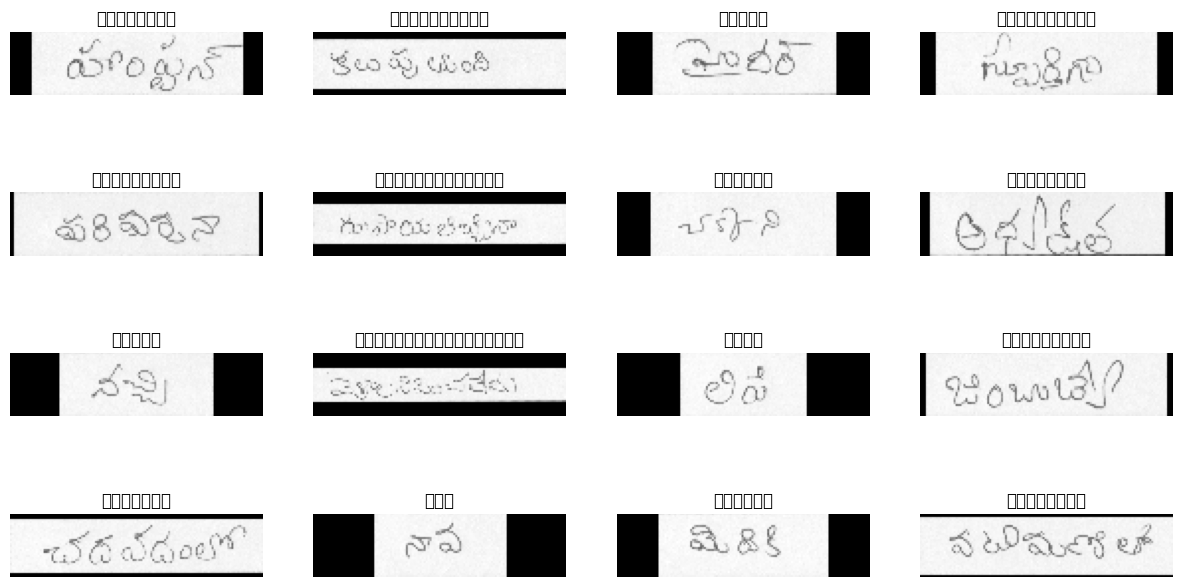

In [ ]:
for data in train_ds.take(1):
  images, labels = data["image"], data["label"]

  _, ax = plt.subplots(4, 4, figsize=(15, 8))

  for i in range(16):
    img = images[i]
    img = tf.image.flip_left_right(img)
    img = tf.transpose(img, perm=[1, 0, 2])
    img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
    img = img[:, :, 0]
    label = labels[i]
    indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
    label = tf.strings.reduce_join(num_to_char(indices))
    label = label.numpy().decode("utf-8")
    ax[i // 4, i % 4].imshow(img, cmap="gray")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")
    print(label)

plt.show()

In [ ]:
!ls -l {train_ds.file_pattern}

ls: cannot access '{train_ds.file_pattern}': No such file or directory


In [ ]:

class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        return y_pred


def build_model():
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    output = CTCLayer(name="ctc_loss")(labels, x)

    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    opt = keras.optimizers.Adam()
    model.compile(optimizer=opt)
    return model


model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 128, 32, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 32, 32)          320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 64, 16, 32)           0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 64, 16, 64)           18496     ['pool1[0][0]']               
                                                                             

In [ ]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

Now, we create a callback to monitor the edit distances.

In [ ]:

def calculate_edit_distance(labels, predictions):
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )


## Training

Now we are ready to kick off model training.

In [ ]:
epochs = 15
model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)


Epoch 1/50
2/2 [==============================] - 0s 12ms/step
Mean edit distance for epoch 1: 26.6007
1134/1134 [==============================] - 147s 118ms/step - loss: 29.9529 - val_loss: 27.5962
Epoch 2/50
2/2 [==============================] - 0s 8ms/step
Mean edit distance for epoch 2: 26.5491
1134/1134 [==============================] - 65s 58ms/step - loss: 27.3061 - val_loss: 27.2350
Epoch 3/50
2/2 [==============================] - 0s 8ms/step
Mean edit distance for epoch 3: 26.3093
1134/1134 [==============================] - 64s 56ms/step - loss: 26.6273 - val_loss: 25.8061
Epoch 4/50
2/2 [==============================] - 0s 8ms/step
Mean edit distance for epoch 4: 25.8328
1134/1134 [==============================] - 64s 56ms/step - loss: 25.0431 - val_loss: 23.8995
Epoch 5/50
2/2 [==============================] - 0s 8ms/step
Mean edit distance for epoch 5: 25.2783
1134/1134 [==============================] - 65s 57ms/step - loss: 23.3601 - val_loss: 21.9431
Epoch 6/50
2

## Inference

2/2 [==============================] - 0s 8ms/step
['బ్యాటరలతో', 'నిష్పత్తిని', 'నవరాత్రి', 'టెర్రరజంతో', 'ఏడవేందల', 'మంత్రా', 'మల్లాది', 'జద్దారపై', 'జరంజేజిని', 'అవకతకాలు', 'పుట్టేదే', 'పసుపు', 'నడివయన్ను', 'నాటకం', 'ఇంతకాలం', 'వెదేళ్ష్పాటు', 'కాంతివంతంగా', 'అవసరమే', 'ఆమోమద్ర', 'వర్ణాబీజ', 'చ్ర్రమవడం', 'కనపడే', 'ఆర్డదేమైన', 'నాటి', 'తప్పిపోయినట్లు', 'పూడడం', 'ప్రారంిస్తామని', 'యల్లోకి', 'డైలీ', 'అగ్గరేతలను', 'సమక్యత', 'రేబాన్', 'కనిపిిస్తుంటుంది', 'పంచ్పరి', 'కారియాన్', 'వ్యకాశమిస్తుంది', 'చేయగలిగిన', 'స్పెడత', 'ఏెలుతున్న', 'ఫోటోని', 'సీలాగలం', 'విక్కతపవడం', 'సంప్థలుకుందట', 'అతగాడికి', 'బాత్యలలోనే', 'తేదీనుండి', 'ఉద్యమం', 'కశాలల్లతో', 'పేర్కతున్నాయి', 'నిర్మాతలు', 'చేసుకున్నాం', 'ఆన్న్ాల్లోనే', 'పాలంలో', 'కల్పించ', 'పాళ్టలతో', 'జనరల్స్', 'వగారాలకు', 'శుభకార్యం', 'ఛారసపరాలు', 'కాజా', 'లరపుతుంటారు', 'తరరచునల్నాననింది', 'పాకుమత్యం', 'ఆలపెట్టి']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3087 (\N{TELUGU LETTER EE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3079 (\N{TELUGU LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


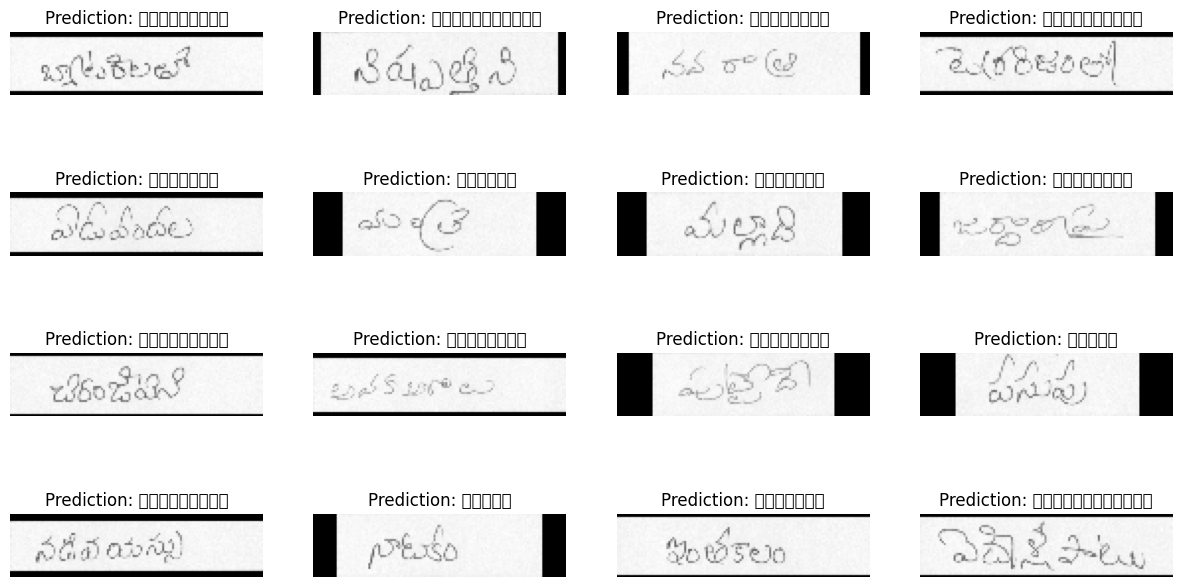

In [ ]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)
    print(pred_texts)
    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
        plt.rc('axes', unicode_minus=False)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

prediction_model.save('Tel_predict.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

files.download('Tel_predict.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf


model = tf.keras.models.load_model('my_model_TL.h5')



model.summary()
#

ValueError: Unknown layer: 'CTCLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow import keras

# Load the saved model
model = tf.keras.models.load_model('Tel_predict.keras')

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)


    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]


    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:,:32]
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

def preprocess_image(image_path, img_size=(128, 32)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image)
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = tf.image.rgb_to_grayscale(image)
    image = distortion_free_resize(image, (128, 32))
    image = tf.cast(image, tf.float32) / 255.0
    return image

image_path = '/content/2.jpg'
#img = preprocess_image(image_path)
img = np.expand_dims(img, axis=0)
print(img)
img = tf.expand_dims(img, axis=0)
predictions = model.predict(img)
text = decode_batch_predictions(predictions)
print(text)




[[[[[[[[[[0.]
         [0.]
         [0.]
         ...
         [0.]
         [0.]
         [0.]]

        [[0.]
         [0.]
         [0.]
         ...
         [0.]
         [0.]
         [0.]]

        [[0.]
         [0.]
         [0.]
         ...
         [0.]
         [0.]
         [0.]]

        ...

        [[0.]
         [0.]
         [0.]
         ...
         [0.]
         [0.]
         [0.]]

        [[0.]
         [0.]
         [0.]
         ...
         [0.]
         [0.]
         [0.]]

        [[0.]
         [0.]
         [0.]
         ...
         [0.]
         [0.]
         [0.]]]]]]]]]]


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "handwriting_recognizer" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 1, 1, 1, 1, 1, 1, 1, 128, 32, 1) dtype=float32>]
